In [1]:
import numpy as np
import matplotlib.pyplot as plt

Normalizing the data and adding a column of 1s to the X matrix

In [2]:
file = open("cancer_data.csv", "r")

lines = file.readlines()

x = []
y= []

for line in lines:
    z = line.split(",")
    y.append(z[-1].removesuffix("\n"))
    z.remove(z[-1])
    x.append(z)
    
x = np.array(x)
y = np.array(y)

x_not_normalized = x

column_index = 0


for i in range(len(x[0])):
    mean = np.mean(x[:, i].astype(float))
    std = np.std(x[:, i].astype(float))
    x[:, i] = (x[:, i].astype(float) - mean) / std
        
for i in range(len(x[0])):
    print(np.mean(x[:, i].astype(float)))
    print(np.std(x[:, i].astype(float)))
    print("")

mean_y = np.mean(y.astype(float))
std_y = np.std(y.astype(float))

y = (y.astype(float) - mean_y) / std_y

print(np.mean(y))
print(np.std(y))

ones = np.ones((x.shape[0], 1))
x = np.hstack((ones, x))

3.768953058628633e-09
0.9999999986792061

3.894322277627826e-09
0.9999999988570476

1.9166393220366134e-09
0.9999999979734531

2.597965207437678e-09
0.9999999979771392

0.0021575811693468985
1.0070649605048472

2.6524450211622004e-09
0.9999999977604757

4.112897934563624e-09
0.9999999992120717

2.304233677728477e-09
0.9999999978668328

2.1752543466294206e-09
0.999999997919416

1.5717289264926404e-15
0.9999999999999999


Calculating a possible theta for testing

In [3]:
y = y.astype(float)
x = x.astype(float)
y = y.reshape(-1, 1)

theta = np.linalg.inv(x.T @ x) @ (x.T @ y)

print(theta)


[[ 3.86602944e-04]
 [-2.88239728e-01]
 [ 3.89810554e-01]
 [ 4.48839286e-01]
 [-2.03312557e-01]
 [-1.79184153e-01]
 [ 2.40828809e-01]
 [-2.42423792e-03]
 [-8.34604252e-03]
 [ 1.74168024e-02]]


In [4]:
def linear_regression(x, theta):
    return x @ theta

In [5]:
ln = linear_regression(x, theta)

ln = ln * std_y + mean_y

print(ln)
print(ln.shape)

[[174.59781095]
 [172.03029138]
 [154.02756287]
 ...
 [165.79897856]
 [165.03045904]
 [169.16540656]]
(3047, 1)


In [6]:
def J(x, y, theta):
    h = linear_regression(x, theta)

    sub = h - y 
    sub = np.square(sub)

    sum = np.sum(sub)
    sum = sum / (2 * len(y))

    return sum


In [7]:
m = J(x, y, theta)

print(m)

0.2898389472914103


In [8]:
def Jacobian(x, y, theta):
    h = linear_regression(x, theta)

    sub = h - y

    J = (x.T @ sub) / len(y)


    return J

In [9]:
Jacob = Jacobian(x, y, theta)
Jacob

array([[-9.91075362e-18],
       [ 1.85389391e-16],
       [ 4.95246188e-16],
       [ 2.56805116e-16],
       [ 2.33194203e-18],
       [ 2.14247174e-16],
       [ 9.09457391e-17],
       [-4.66388405e-18],
       [-3.38131594e-17],
       [ 6.06304927e-17]])

In [10]:
def Gradiant_descent(x, y, alpha, iterations):
    J_list = []
    theta_temp = np.zeros((x.shape[1], 1))
    for _ in range(iterations):
        Jacob = Jacobian(x, y, theta_temp)
        theta_temp = theta_temp - alpha * Jacob
        J_list.append(J(x, y, theta_temp))
    
    plt.plot(J_list)
    plt.title(f'alpha = {alpha}')
    plt.ylabel('J value')
    plt.xlabel('iterations')
    plt.xlim(0, iterations)
    # plt.ylim(0, 1)
    plt.show()


    return theta_temp

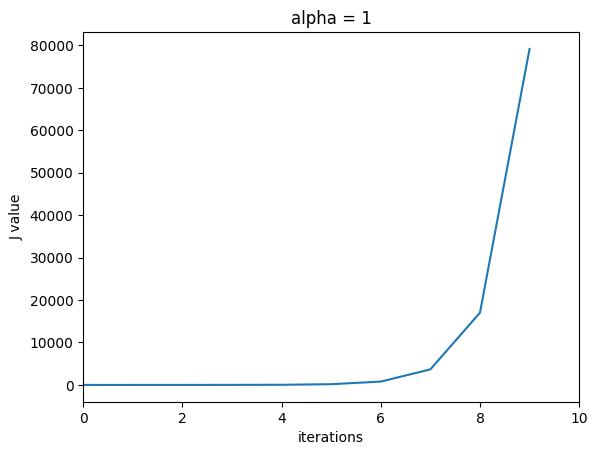

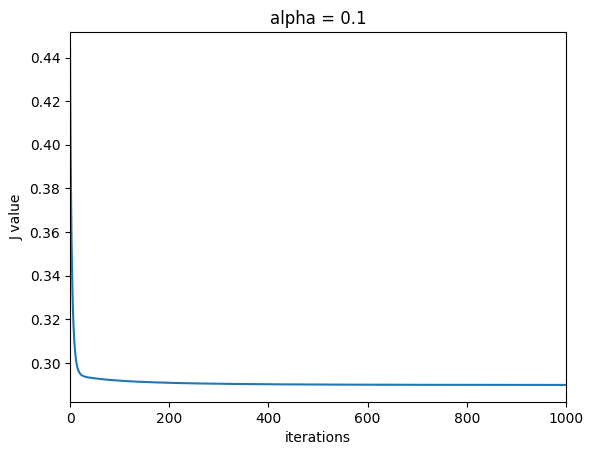

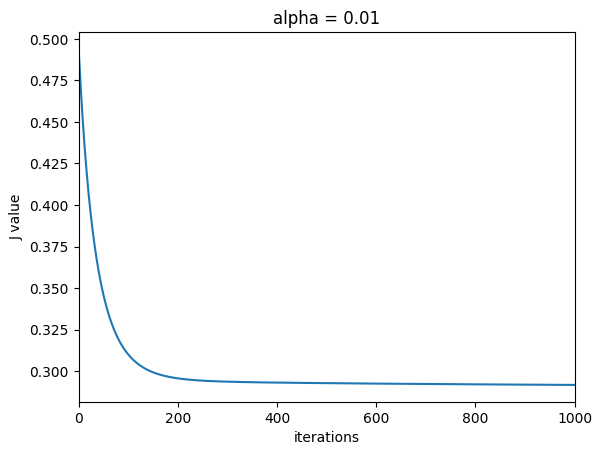

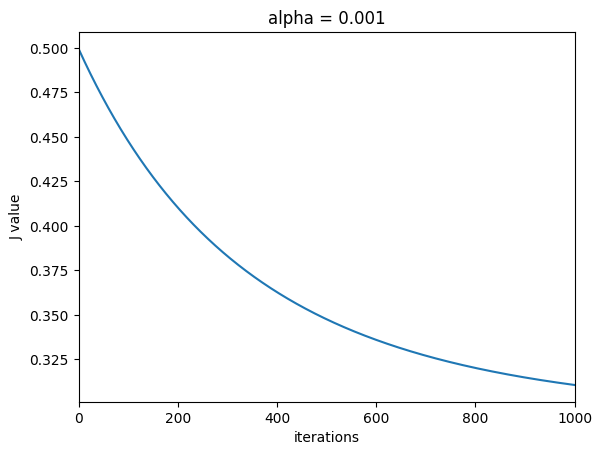

In [11]:
# theta = np.zeros((x.shape[1], 1))

new_theta_4 = Gradiant_descent(x, y, 1, 10)
new_theta_3 = Gradiant_descent(x, y, 0.1, 1000)
new_theta_1 = Gradiant_descent(x, y, 0.01, 1000)
new_theta_2 = Gradiant_descent(x, y, 0.001, 1000)

ln = linear_regression(x, new_theta_1)

ln = ln * std_y + mean_y

In [12]:
def minibatch(x, y, alpha, iterations, batch_size):
    J_list = []
    theta_temp = np.zeros((x.shape[1], 1))
    for _ in range(iterations):
        for i in range(0, len(y), batch_size):
            x_batch = x[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            Jacob = Jacobian(x_batch, y_batch, theta_temp)
            theta_temp = theta_temp - alpha * Jacob
            J_list.append(J(x, y, theta_temp))
    
    plt.plot(J_list)
    plt.title(f'alpha = {alpha}')
    plt.ylabel('J value')
    plt.xlabel('iterations')
    plt.xlim(-30, 1000)
    # plt.ylim(0, 0.7)
    plt.show()

    return theta_temp

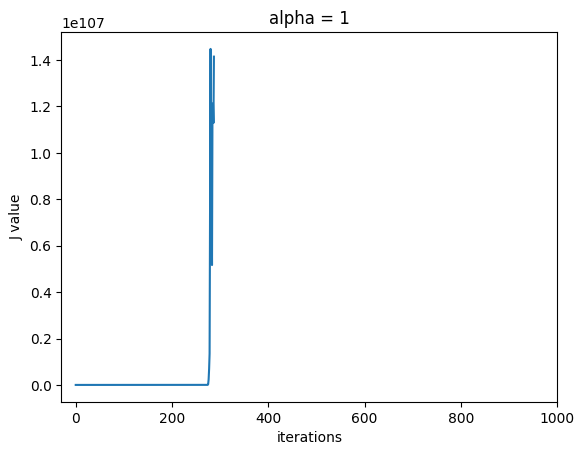

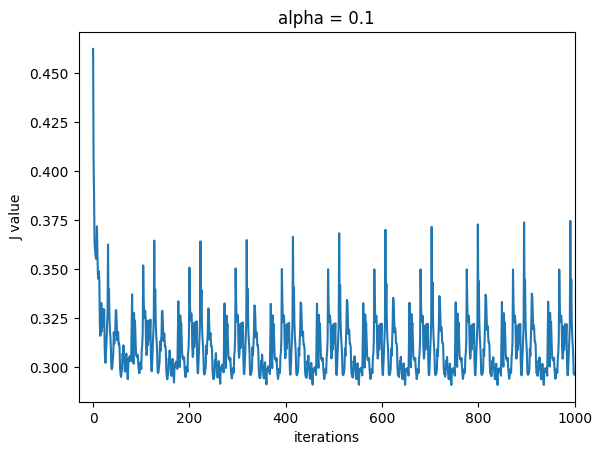

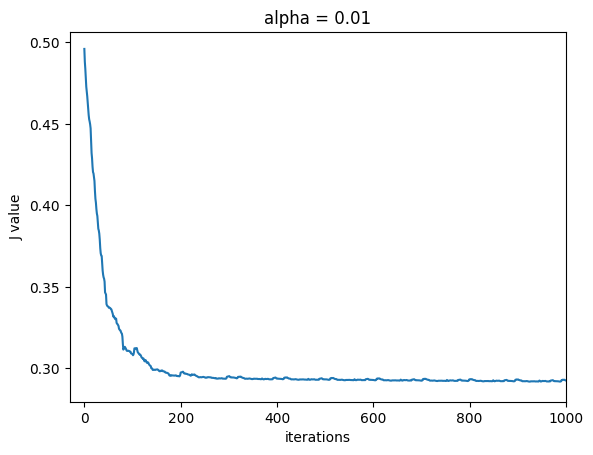

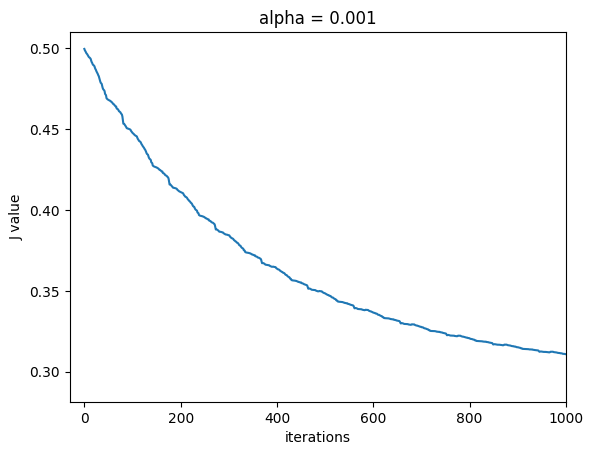

[[174.89107172]
 [172.22886831]
 [152.75677063]
 ...
 [167.28353575]
 [165.81678616]
 [171.29885312]]


In [13]:

newest_theta4 = minibatch(x, y, 1, 3, 32)
newest_theta1 = minibatch(x, y, 0.1, 100, 32)
newest_theta2 = minibatch(x, y, 0.01, 100, 32)
newest_theta3 = minibatch(x, y, 0.001, 100, 32)




ln = linear_regression(x, newest_theta2)

ln = ln * std_y + mean_y
print(ln)

What we can see from the two different implementations is that 0.001 is the best learning rate between the others, also that in the first algorithm we seem to see a change in the graphs depending on the number of iterations, while we don't see much of a change when changing the number of iterations with the mini batch algorithm.

(3047, 3)


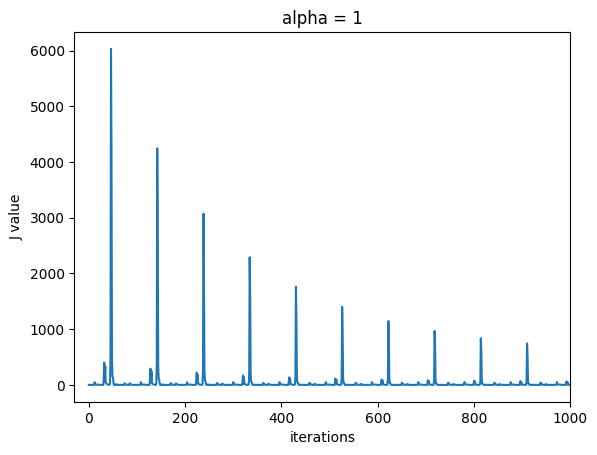

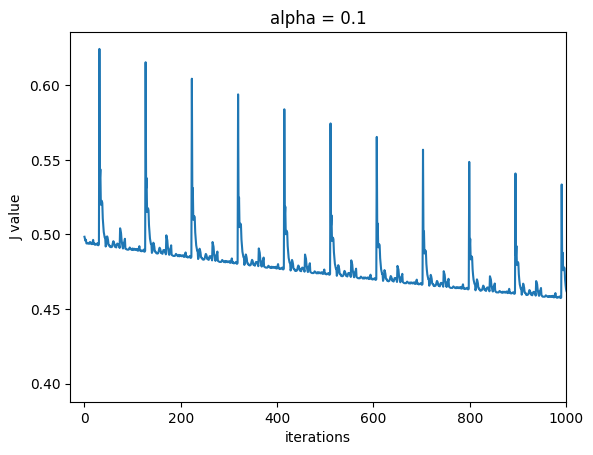

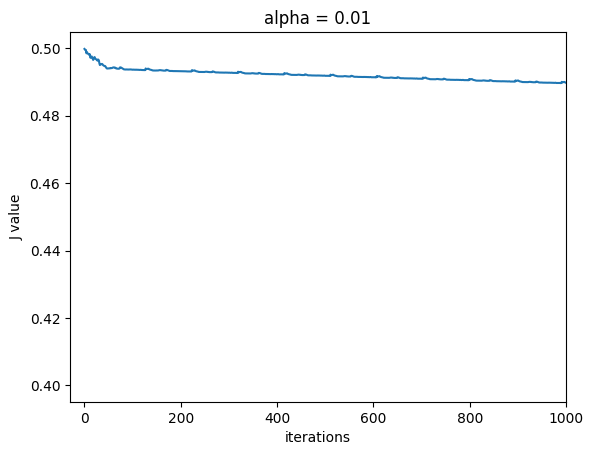

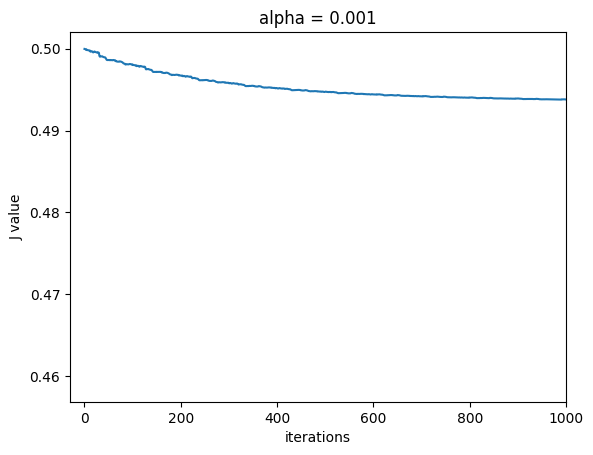

In [15]:
u,s,v = np.linalg.svd(x)

sTemp = np.diag(s)

uTemp = u[:, 0:3]
sTemp = sTemp[0:3]
vTemp = v[:, 0:3]

xTemp = uTemp @ sTemp @ vTemp

print(xTemp.shape)

newest_theta4 = minibatch(xTemp, y, 1, 1000, 32)
newest_theta1 = minibatch(xTemp, y, 0.1, 1000, 32)
newest_theta2 = minibatch(xTemp, y, 0.01, 1000, 32)
newest_theta3 = minibatch(xTemp, y, 0.001, 1000, 32)

#ln = linear_regression(xTemp, new_theta_1)
#ln = ln * std_y + mean_y
#print(ln)

# ln1 = linear_regression(xTemp, theta_svd_reg)
# ln1 = ln1 * std_y + mean_y
# print(ln1)


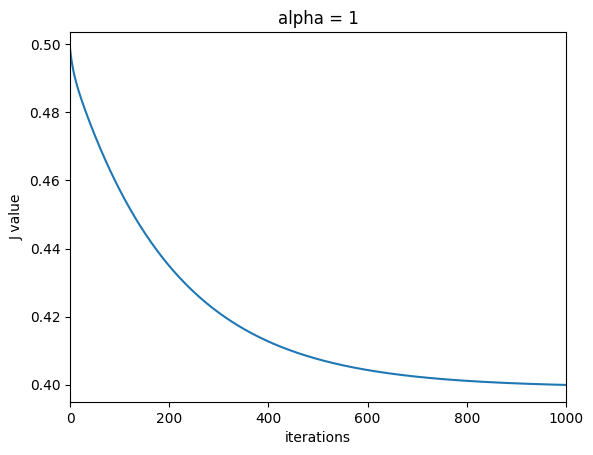

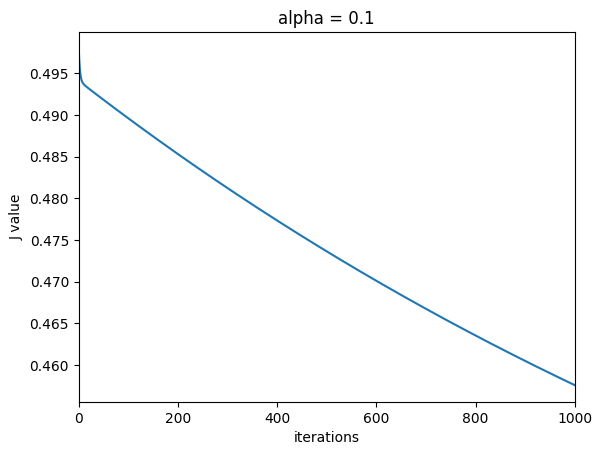

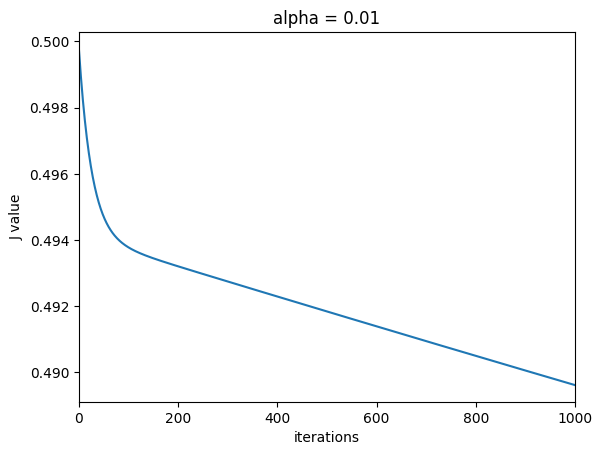

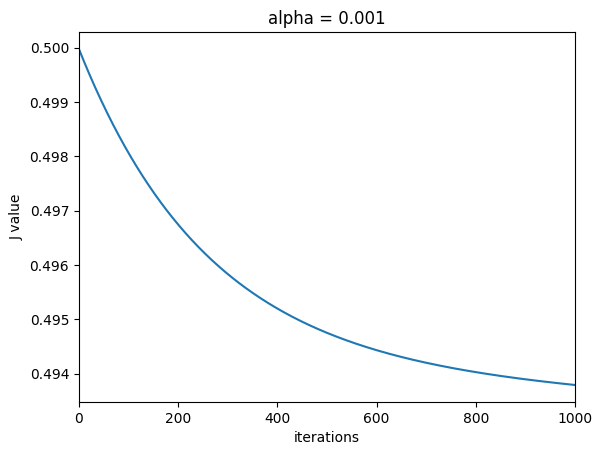

[[174.62953753]
 [180.68428307]
 [178.1965592 ]
 ...
 [178.7277527 ]
 [177.34743001]
 [180.23451875]]


In [ ]:
new_theta_4 = Gradiant_descent(xTemp, y, 1, 1000)
new_theta_3 = Gradiant_descent(xTemp, y, 0.1, 1000)
new_theta_1 = Gradiant_descent(xTemp, y, 0.01, 1000)
new_theta_2 = Gradiant_descent(xTemp, y, 0.001, 1000)

ln = linear_regression(xTemp, new_theta_3)
ln = ln * std_y + mean_y
print(ln)

The first quite clear difference we saw was the runtime, most of the mini batch runtimes were extremeley longer than what it took after implementing svd, other than that, using the learning rate 1 was almost impossible before svd, afterwards it was not only faster to execute it gave better results using alpha = 1.
Also the difference in graphs was more noticable with the mini batch algorithm, since it didn't change the graphs much in the gradiant descent.